In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read vacancies data

In [186]:
df = pd.read_csv("../scraping/vacancies.csv")
df.head()

,applications,company,experience,salary,tags,views
0,2,UPPeople,3,4500.0,"Python,C++",12
1,3,Akvelon Tech Ukraine,3,NaN,"Python,AWS,Kubernetes",14
2,2,Corva.AI,3,NaN,Python,4
3,1,SoftServe,3,NaN,"ROS,or ROS2,CODESYS,or DIN EN 61131 PLC progra...",18
4,1,inVerita,5,NaN,"Python,Postgre,Nginx,Django",16


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   applications  334 non-null    int64  
 1   company       334 non-null    object 
 2   experience    334 non-null    int64  
 3   salary        54 non-null     float64
 4   tags          252 non-null    object 
 5   views         334 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 15.8+ KB


# Data cleaning and wrangling

Remove `nan` values and duplicates. Converting technologies tags to categories, standardize tags.

In [188]:
df = df[df["tags"].notna()]
len(df)

252

In [189]:
df[df.duplicated(subset=["company", "experience", "salary", "tags"], keep=False)]

,applications,company,experience,salary,tags,views
14,1,SD Solutions,5,NaN,Python,17
15,0,SD Solutions,5,NaN,Python,12
177,6,:DTeam,3,NaN,"Python,Django,Django Rest Framework,Docker,API...",67
195,1,8allocate,5,NaN,"Python,Node.js,ML,OCR,AWS",16
223,33,OSF Digital,2,NaN,"Python,API,Agile,Fluent English",162
232,11,:DTeam,3,NaN,"Python,Django,Django Rest Framework,Docker,API...",67
261,1,8allocate,5,NaN,"Python,Node.js,ML,OCR,AWS",20
327,121,OSF Digital,2,NaN,"Python,API,Agile,Fluent English",397


In [190]:
df.drop_duplicates(subset=["company", "experience", "salary", "tags"], inplace=True, ignore_index=True)

In [191]:
len(df)

248

In [192]:
df["tags_category"] = df["tags"].astype("category")
df["tags_category"] = df["tags_category"].str.lower().str.replace(r"python\d", "python", regex=True).str.replace(" / ", ",").str.replace("/", ",").str.replace("-", " ").str.replace(r"postgre[a-z]*", "postgresql", regex=True).str.replace(r"node.*js|node", "node.js", regex=True).str.replace(r"mongo.*db|mongo", "mongodb", regex=True).str.replace(r"react.*js|react", "react.js", regex=True).str.replace(r"\bml\b", "machine learning", regex=True).str.replace(r"restful api|restapi|api rest", "rest api", regex=True).str.replace("postgresql sql", "postgresql").str.replace(r"django rest(?! framework)|drf", "django rest framework", regex=True).str.replace("fast api", "fastapi").str.replace(r"aws [a-z]+", "aws", regex=True).str.replace(r"back end|backend development", "backend", regex=True).str.replace(r"docer|docker compose", "docker", regex=True).str.replace(r"google cloud platform|gcp", "google cloud", regex=True).str.replace("java script", "javascript").str.replace("my sql", "mysql").str.replace("azure cloud", "azure")

Making dummies from tags categories and define TOP-25 technologies. Joining dummies to the original dataframe.

In [193]:
tags_dummies = df["tags_category"].str.get_dummies(",")
top_25_tags = tags_dummies.sum().sort_values(ascending=False).head(25)

In [194]:
top_25_columns = top_25_tags.index.to_list()

In [195]:
df_25_tags_dummies = tags_dummies[top_25_columns]

In [196]:
df = df.join(df_25_tags_dummies)

In [197]:
df = df.drop(columns=["tags", "tags_category"])
df.head()

,applications,company,experience,salary,views,python,django,aws,postgresql,react.js,...,node.js,javascript,linux,mysql,mongodb,nosql,celery,redis,git,backend
0,2,UPPeople,3,4500.0,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,Akvelon Tech Ukraine,3,NaN,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Corva.AI,3,NaN,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,SoftServe,3,NaN,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,inVerita,5,NaN,16,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Analyzing data

Finding correlations for data.

In [198]:
df[["salary", *top_25_columns]].corr()["salary"].sort_values(ascending=False)

salary                   1.000000
machine learning         0.506068
aws                      0.199316
react.js                 0.055015
kubernetes              -0.001499
mongodb                 -0.002143
linux                   -0.002143
postgresql              -0.003885
git                     -0.024773
flask                   -0.055690
fastapi                 -0.055730
python                  -0.060338
backend                 -0.062166
celery                  -0.076472
redis                   -0.098599
node.js                 -0.102288
sql                     -0.113781
azure                   -0.113958
docker                  -0.126192
django rest framework   -0.168257
django                  -0.179159
rest api                -0.223838
google cloud            -0.226416
javascript              -0.338853
nosql                   -0.339739
mysql                         NaN
Name: salary, dtype: float64

In [199]:
df[["applications", *top_25_columns]].corr()["applications"].sort_values(ascending=False)

applications             1.000000
django rest framework    0.180463
django                   0.118068
flask                    0.086723
redis                    0.081896
docker                   0.081341
rest api                 0.070699
nosql                    0.044708
postgresql               0.044295
fastapi                  0.032342
node.js                  0.016862
celery                   0.014033
sql                      0.007372
mysql                   -0.006178
git                     -0.011180
linux                   -0.013265
javascript              -0.018125
google cloud            -0.020626
machine learning        -0.023048
python                  -0.025664
mongodb                 -0.035255
backend                 -0.055700
aws                     -0.056255
azure                   -0.079767
kubernetes              -0.084977
react.js                -0.186744
Name: applications, dtype: float64

In [200]:
df[["experience", *top_25_columns]].corr()["experience"].sort_values(ascending=False)

experience               1.000000
aws                      0.219710
react.js                 0.196520
google cloud             0.151587
python                   0.110330
kubernetes               0.101470
azure                    0.085717
mysql                    0.082899
postgresql               0.049409
git                      0.044080
django                   0.032857
linux                    0.012894
node.js                  0.003535
docker                  -0.001260
nosql                   -0.006748
backend                 -0.016661
sql                     -0.018631
mongodb                 -0.036630
javascript              -0.037556
fastapi                 -0.043350
celery                  -0.044107
flask                   -0.067028
rest api                -0.089556
redis                   -0.106973
django rest framework   -0.114165
machine learning        -0.159388
Name: experience, dtype: float64

In [201]:
df[["views", *top_25_columns]].corr()["views"].sort_values(ascending=False)

views                    1.000000
django rest framework    0.199292
redis                    0.098348
django                   0.082264
docker                   0.065458
postgresql               0.048263
flask                    0.045897
rest api                 0.045608
node.js                  0.044714
celery                   0.020636
machine learning         0.019541
javascript               0.008820
nosql                    0.008786
linux                    0.007355
sql                      0.007179
fastapi                 -0.005897
git                     -0.007152
python                  -0.012257
mongodb                 -0.027711
backend                 -0.037391
mysql                   -0.046314
google cloud            -0.061984
kubernetes              -0.068857
azure                   -0.083270
aws                     -0.094864
react.js                -0.198519
Name: views, dtype: float64

In [202]:
df[["views", "applications", "salary"]].corr()["salary"]

views          -0.558358
applications   -0.613206
salary          1.000000
Name: salary, dtype: float64

In [203]:
df[["views", "applications", "experience"]].corr()["experience"]

views          -0.612420
applications   -0.554883
experience      1.000000
Name: experience, dtype: float64

# Visualizing data

Making bar chart with TOP-25 technologies.

Text(0.5, 1.0, 'Top 25 technologies from Python Developer vacancies')

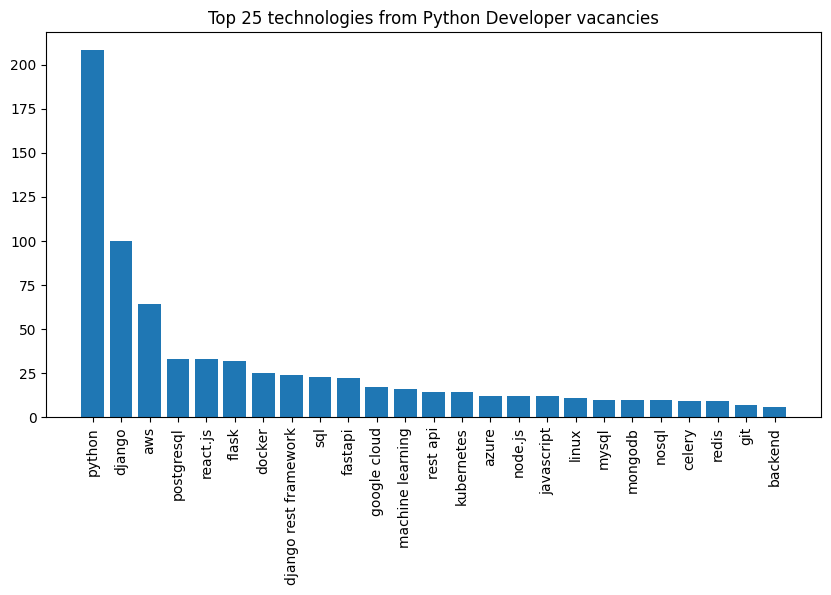

In [204]:
top_25_technologies = df_25_tags_dummies.sum()
plt.figure(figsize=(10, 5))
plt.bar(top_25_technologies.index, top_25_technologies.values)
plt.xticks(rotation=90)
plt.title("Top 25 technologies from Python Developer vacancies")